# Question 1

The data in the file Books.dat is compiled from the catalogue of American Goverment books at Spring, 1988. It lists prices Price, number of pages P and the binding B (p - paperback, c - ) of books published by a certain publisher.

1. Find a reasonable linear model to this data using a price as the dependent variable and performing appropriate transformations of variables if necessary. 
    - Examine the goodness-of-fit of your final model and comment the results.
2. Although most of the data are for books published in 1988, in fact, two of the cloth-bound books were published in 1970's, one of the paperbacks in 1989 and another in 1984. 
    - Can you identify them? 
    - Delete them from the data and find an adequate linear model for the reduced data set. 
    - Did the omitted observations strongly affect the model?
3. Another possible way to reduce the influence of outliers is robust regression. 
    - Fit robust regression(s) and comment the results.
4. What model(s) would you introduce to a client? 
    - How would you interpret your results to him/her? (he is a complete "amateur" in statistics)
5. Estimate the price of a 200-page book for the two types of binding and give the corresponding 95% prediction intervals.

## Find a reasonable linear model to this data using a price as the dependent variable and performing appropriate transformations of variables if necessary. 
    - Examine the goodness-of-fit of your final model and comment the results.

Price,P,B
10.25,112,p
14.25,260,p
29.25,250,c
17.50,382,p
12.00,175,p
24.50,146,c


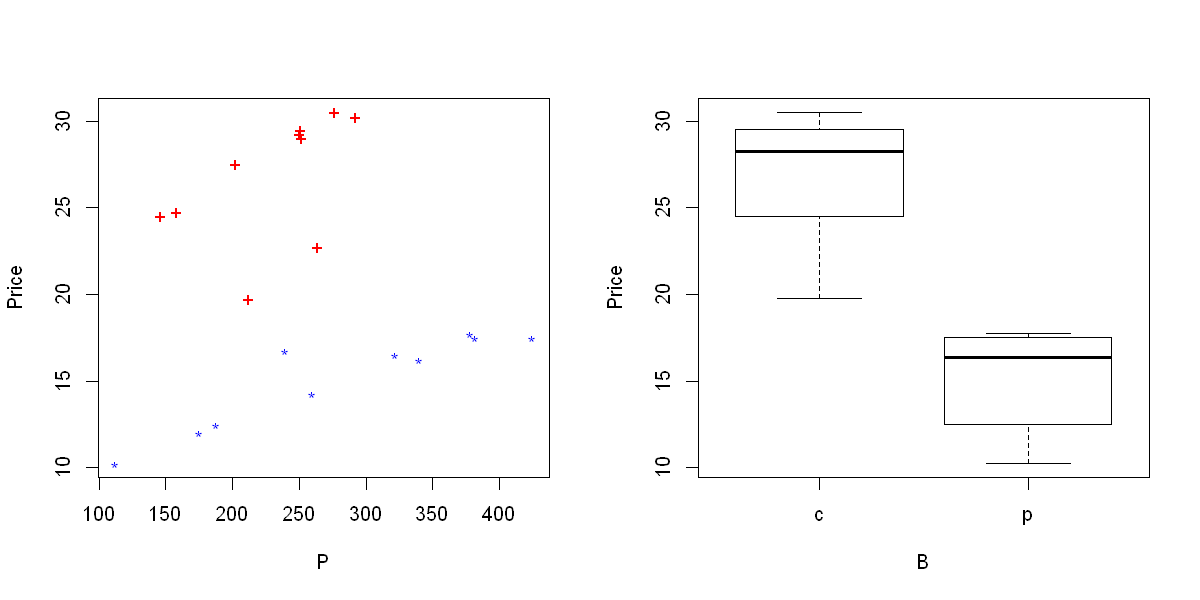

In [1]:
books = read.table("Books.dat", header = T)

books$B <- as.factor(books$B)
head(books)
# Define color for each of the 2 categories
colors <- c("Red", "Blue")
colors <- colors[books$B]

# Define shapes
shapes = c('+', '*') 
shapes <- shapes[books$B]

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(Price ~ P, data = books, col=colors, pch=shapes)
plot(Price ~ B, data = books)

$$
\text{Looks like a parallel regression model will by appropriate for this data}
$$

In [2]:
lm.fit=lm(Price ~ P + B + P*B, data = books)
# summary(lm.fit)

$$
\text{The interaction is not significant, lets test if it is rellevant}
$$
$$
H_0: \beta_{P*B} = 0
$$

In [3]:
lm.fit.no.interaction=lm(Price ~ P + B, data = books)
# summary(lm.fit.no.interaction)

anova(lm.fit.no.interaction, lm.fit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
17,100.28849,NA,NA,NA,NA
16,96.34474,1,3.943743,0.6549386,0.4302236


$$
\text{We will not reject } H_0 \text{ and conclude that the interaction may be equal to zero} 
$$
$$
\text{We will use the model without the interaction}
$$

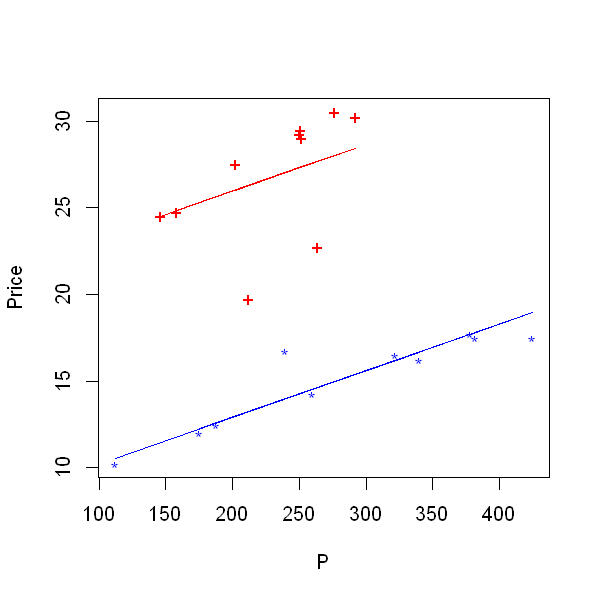

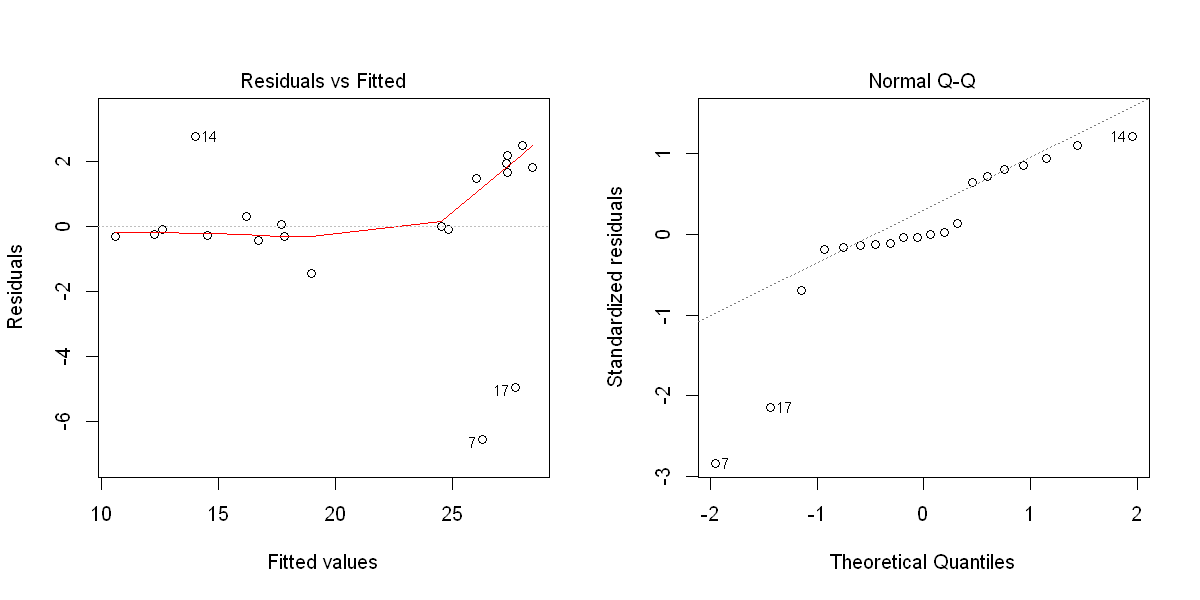

In [4]:
options(repr.plot.width=5, repr.plot.height=5)
par(mfrow = c(1,1))
plot(Price ~ P, data = books, col=colors, pch=shapes)
lines(books[books$B=='p',]$P, predict(lm.fit.no.interaction, books[books$B=='p',]), col="Blue")
lines(books[books$B=='c',]$P, predict(lm.fit.no.interaction, books[books$B=='c',]), col="Red")

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(lm.fit.no.interaction, which = 1:2)

$$
\text{The summary of the model looks fine, there are clearly some outliers.} 
$$
$$
\text{Looks like the residuals assumption aren't met but this data set is not big...} 
$$
$$
\text{Let's try to improve it using transformation}
$$

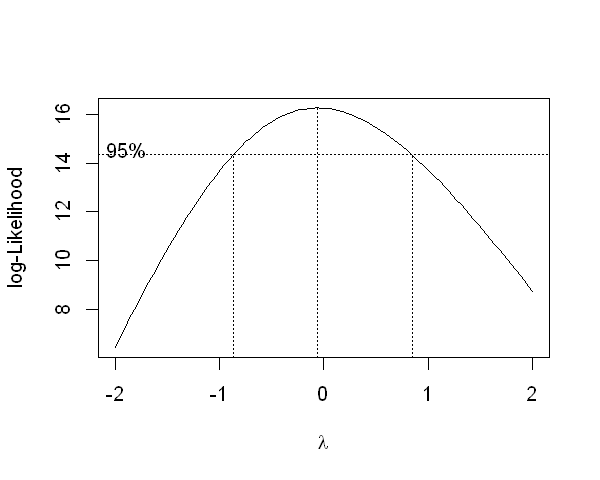

In [5]:
library(MASS)
options(repr.plot.width=5, repr.plot.height=4)
lamb = boxcox(lm.fit.no.interaction, lambda = seq(-2, 2, 1/10), plotit = TRUE, eps = 1/50, xlab = expression(lambda), ylab = "log-Likelihood")

$$
\text{Log transformation to the dependant variable may be a good transformation here} 
$$
$$
\text{Let's try both and compare them}
$$


Call:
lm(formula = log(Price) ~ P + B, data = books)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26486 -0.02311  0.02264  0.06107  0.18798 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.8958193  0.0798191  36.280  < 2e-16 ***
P            0.0016613  0.0003135   5.299 5.89e-05 ***
Bp          -0.6641103  0.0508064 -13.071 2.69e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1076 on 17 degrees of freedom
Multiple R-squared:  0.9102,	Adjusted R-squared:  0.8996 
F-statistic: 86.12 on 2 and 17 DF,  p-value: 1.271e-09


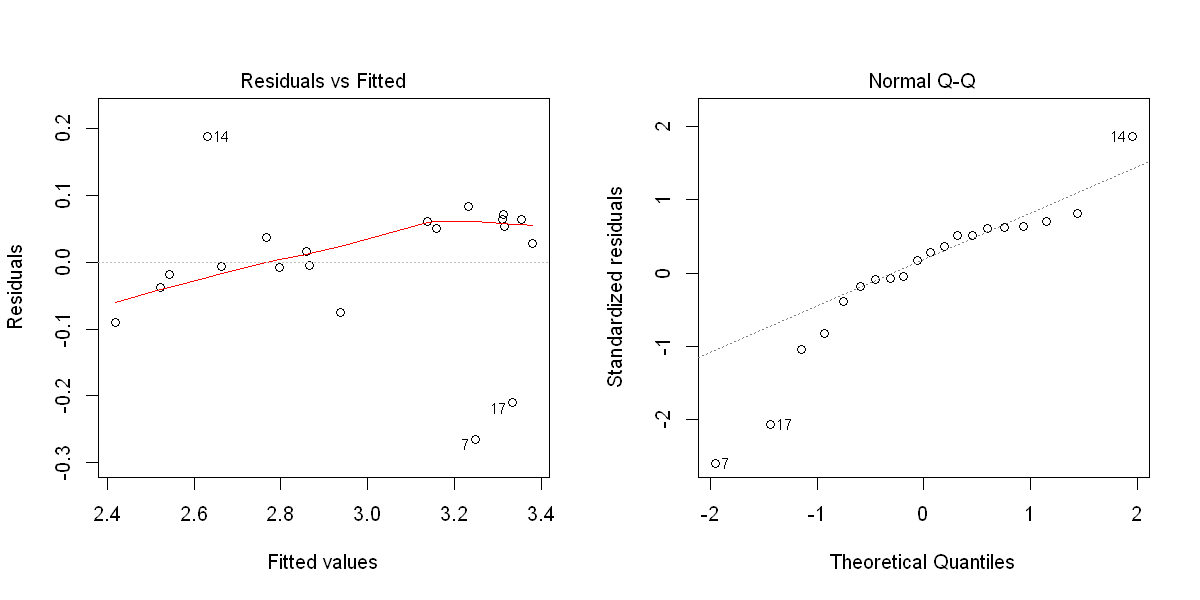

In [6]:
lm.log.fit=lm(log(Price) ~ P + B, data = books)
summary(lm.log.fit)

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(lm.log.fit, which = 1:2)

$$
\text{Looks much better, also the RSS, R squared and coefficients are more significant!} 
$$
$$
\text{Lets try a log-log model.}
$$
$$
\text{First, make sure log transformation is still relevant after log transformation on P}
$$

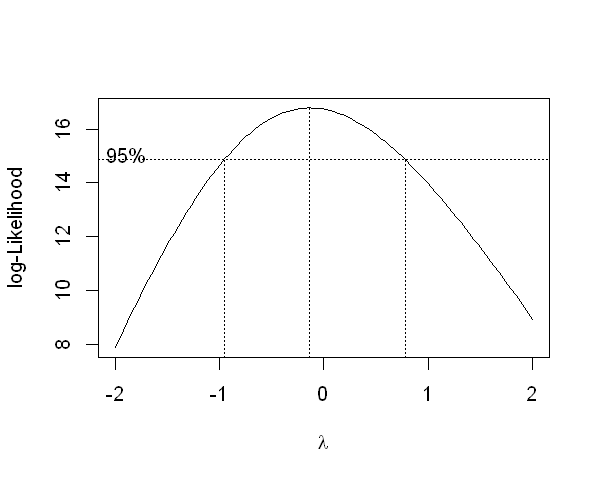

In [30]:
lm.logP.fit=lm(Price ~ log(P) + B, data = books)
# summary(lm.logP.fit)

options(repr.plot.width=5, repr.plot.height=4)
par(mfrow = c(1,1))
lamb = boxcox(lm.logP.fit, lambda = seq(-2, 2, 1/10), plotit = TRUE, eps = 1/50, xlab = expression(lambda), ylab = "log-Likelihood")

$$
\text{YES! Let's try a log-log model}
$$


Call:
lm(formula = log(Price) ~ log(P) + B, data = books)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27165 -0.03651  0.02453  0.05926  0.15323 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.12797    0.39194   2.878   0.0104 *  
log(P)       0.39705    0.07211   5.506 3.85e-05 ***
Bp          -0.63889    0.04827 -13.237 2.21e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.105 on 17 degrees of freedom
Multiple R-squared:  0.9144,	Adjusted R-squared:  0.9044 
F-statistic: 90.82 on 2 and 17 DF,  p-value: 8.418e-10


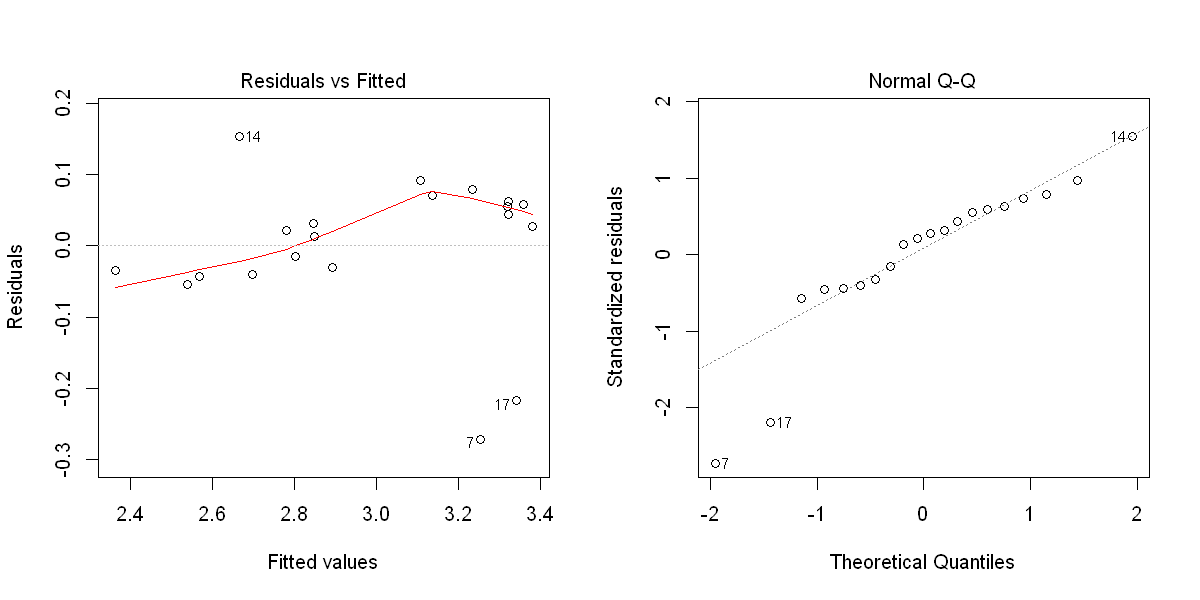

In [31]:
lm.loglog.fit=lm(log(Price) ~ log(P) + B, data = books)
summary(lm.loglog.fit)

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(lm.loglog.fit, which = 1:2)

$$
\text{Better in RSS and R squared, but the coefficients are not significant now.} 
$$
$$
\text{We have to retry it after removing the outliers}
$$

## Although most of the data are for books published in 1988, in fact, two of the cloth-bound books were published in 1970's, one of the paperbacks in 1989 and another in 1984. 
    - Can you identify them? 
    - Delete them from the data and find an adequate linear model for the reduced data set. 
    - Did the omitted observations strongly affect the model?

In [32]:
cooksd <- cooks.distance(lm.loglog.fit)
sample_size <- nrow(books)

# influential row numbers
influential <- as.numeric(names(cooksd)[(cooksd > (4/sample_size))])

# Removing Outliers
data_screen <- books[-influential, ]

cat("influential: ", influential)

# Define color for each of the 2 categories
colors <- c("Red", "Blue")
colors <- colors[data_screen$B]

# Define shapes
shapes = c('+', '*') 
shapes <- shapes[data_screen$B]

influential:  7 17

$$
\text{The influential observations are 7 and 17. Let's remove them and re-fit the models} 
$$
$$
\text{By cooks distance, they strongly affected the model}
$$


Call:
lm(formula = log(Price) ~ log(P) + B, data = data_screen)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.050067 -0.032982 -0.006216  0.017336  0.154280 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.12520    0.18479   6.089 2.07e-05 ***
log(P)       0.40888    0.03405  12.010 4.28e-09 ***
Bp          -0.70198    0.02403 -29.209 1.23e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04924 on 15 degrees of freedom
Multiple R-squared:  0.9833,	Adjusted R-squared:  0.981 
F-statistic: 440.5 on 2 and 15 DF,  p-value: 4.766e-14


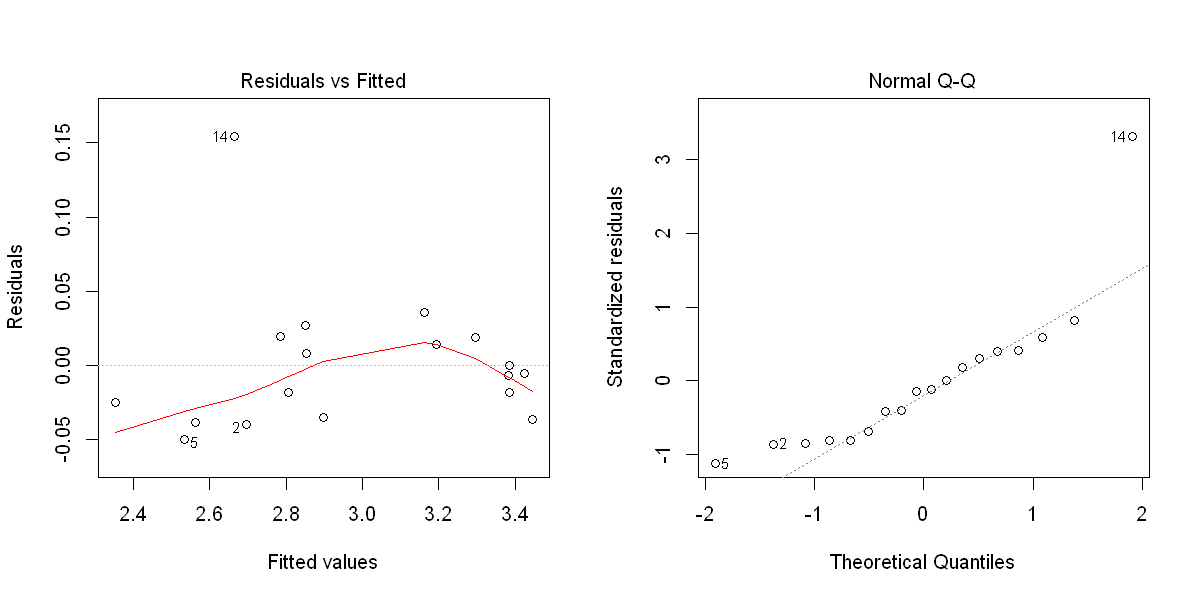

In [33]:
lm.loglog.screen.fit=lm(log(Price) ~ log(P) + B, data = data_screen)
summary(lm.loglog.screen.fit)

# options(repr.plot.width=5, repr.plot.height=5)
# par(mfrow = c(1,1))
# plot(log(Price) ~ log(P), data = data_screen, col=colors, pch=shapes)
# lines(log(data_screen[data_screen$B=='p',]$P), predict(lm.loglog.screen.fit, data_screen[data_screen$B=='p',]), col="Blue")
# lines(log(data_screen[data_screen$B=='c',]$P), predict(lm.loglog.screen.fit, data_screen[data_screen$B=='c',]), col="Red")

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(lm.loglog.screen.fit, which = 1:2)

$$
\text{Much better now! but from the residuals plots looks like i forgot an explanatory variable.}
$$
$$
\text{Let's try to add the interaction back adter removing the outliers}
$$


Call:
lm(formula = log(Price) ~ log(P) + B + log(P) * B, data = data_screen)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.046229 -0.022085 -0.003334  0.010665  0.156248 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.53956    0.38287   4.021 0.001263 ** 
log(P)       0.33219    0.07079   4.693 0.000346 ***
Bp          -1.23942    0.43774  -2.831 0.013330 *  
log(P):Bp    0.09878    0.08034   1.230 0.239130    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04842 on 14 degrees of freedom
Multiple R-squared:  0.9849,	Adjusted R-squared:  0.9817 
F-statistic: 304.2 on 3 and 14 DF,  p-value: 5.609e-13


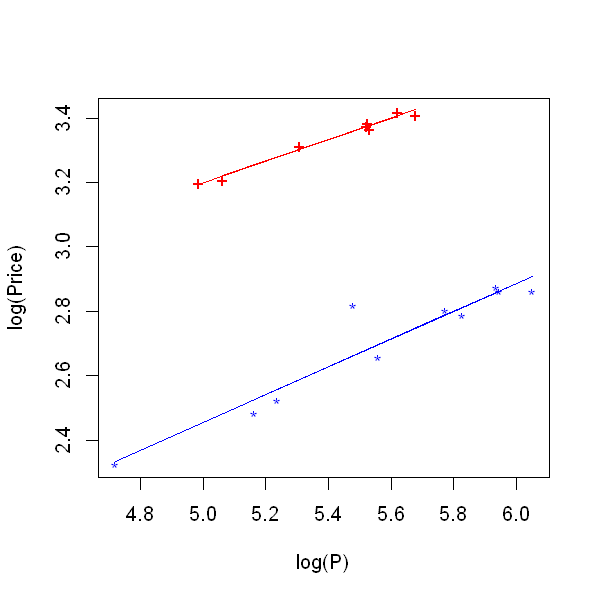

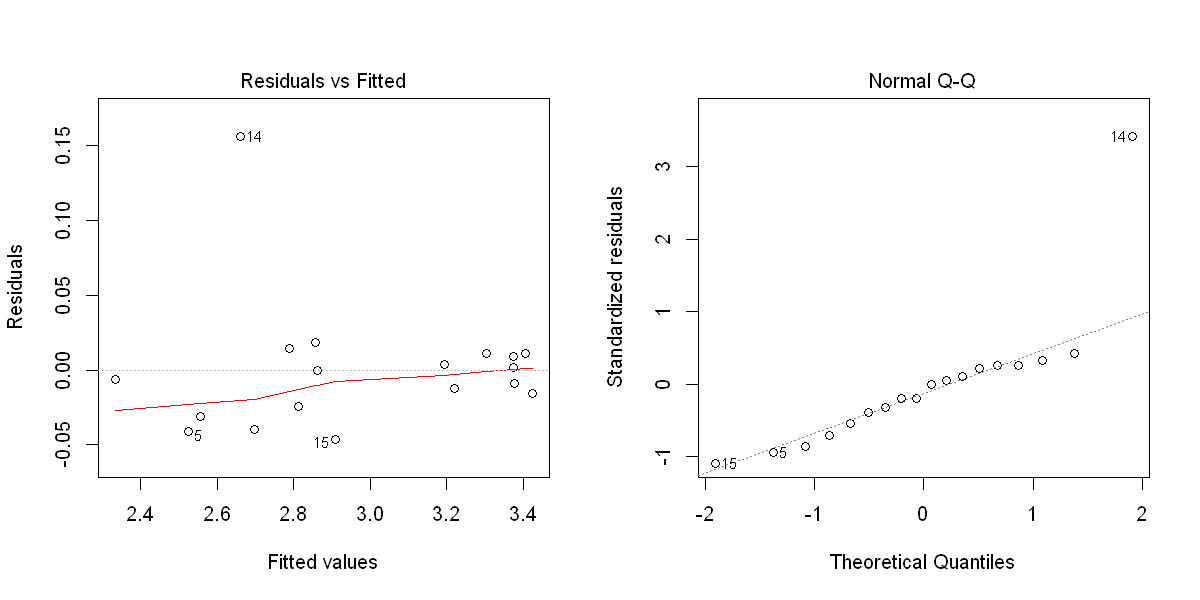

In [34]:
lm.loglog.screen.full.fit=lm(log(Price) ~ log(P) + B + log(P) * B, data = data_screen)
summary(lm.loglog.screen.full.fit)

options(repr.plot.width=5, repr.plot.height=5)
par(mfrow = c(1,1))
plot(log(Price) ~ log(P), data = data_screen, col=colors, pch=shapes)
lines(log(data_screen[data_screen$B=='p',]$P), predict(lm.loglog.screen.full.fit, data_screen[data_screen$B=='p',]), col="Blue")
lines(log(data_screen[data_screen$B=='c',]$P), predict(lm.loglog.screen.full.fit, data_screen[data_screen$B=='c',]), col="Red")

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(lm.loglog.screen.full.fit, which = 1:2)

$$
\text{The interaction coefficient is not significant, but the residuals assumptions are much better now.} 
$$
$$
\text{The data set is small so the residuals plots may be good enough} 
$$
$$
\text{Let's compare the final models}
$$

In [35]:
crossVal <- function(lm.object)
{
    # Computes the cross-validation (CV), the generalized cross-validation (GCV) and the cross-validation correlation coefficient (R^2_{CV}) for the specified linear model
    res <- lm.object$residuals
    y <- lm.object$fitted.values + lm.object$residuals
    h <- lm.influence(lm.object)$hat
    n <- length(y)
    cv <- mean(res^2/(1 - h)^2)
    gcv <- (n * sum(res^2))/lm.object$df^2
    r2cv <- cor(y, y - res/(1 - h))^2
    return(cbind(cv, gcv, r2cv))
}

In [36]:
lm.loglog.screen.full.fit.crossVal <- crossVal(lm.loglog.screen.full.fit)
lm.loglog.screen.fit.crossVal <- crossVal(lm.loglog.screen.fit)
models <- c("full log log model", "log log model")

results <- cbind(models,
                 rbind(lm.loglog.screen.full.fit.crossVal, lm.loglog.screen.fit.crossVal))
results

models,cv,gcv,r2cv
full log log model,0.00242015936483855,0.00301468005114989,0.979970214293035
log log model,0.00271161055181001,0.00290970332858164,0.977562137922682


$$
\text{Both models are almost the same, but the full log log model meets the residuals assumption much better} \\
$$

$$
\text{SUMMARY} 
$$
$$
\text{The full log log model is the choosen model for this data}
$$

## Another possible way to reduce the influence of outliers is robust regression. 
    - Fit robust regression(s) and comment the results.

$$
\text{First, let's try on the original scale}
$$

In [37]:
mod.huber <- rlm(Price ~ P + B + P * B, data = books, psi = psi.huber)
mod.hampel <- rlm(Price ~ P + B + P * B, data = books, psi = psi.hampel)
mod.tukey <- rlm(Price ~ P + B + P * B, data = books, psi = psi.bisquare)
mod.lms <- lqs(Price ~ P + B + P * B, data = books, method = "lms")
mod.lts <- lqs(Price ~ P + B + P * B, data = books, method = "lts")

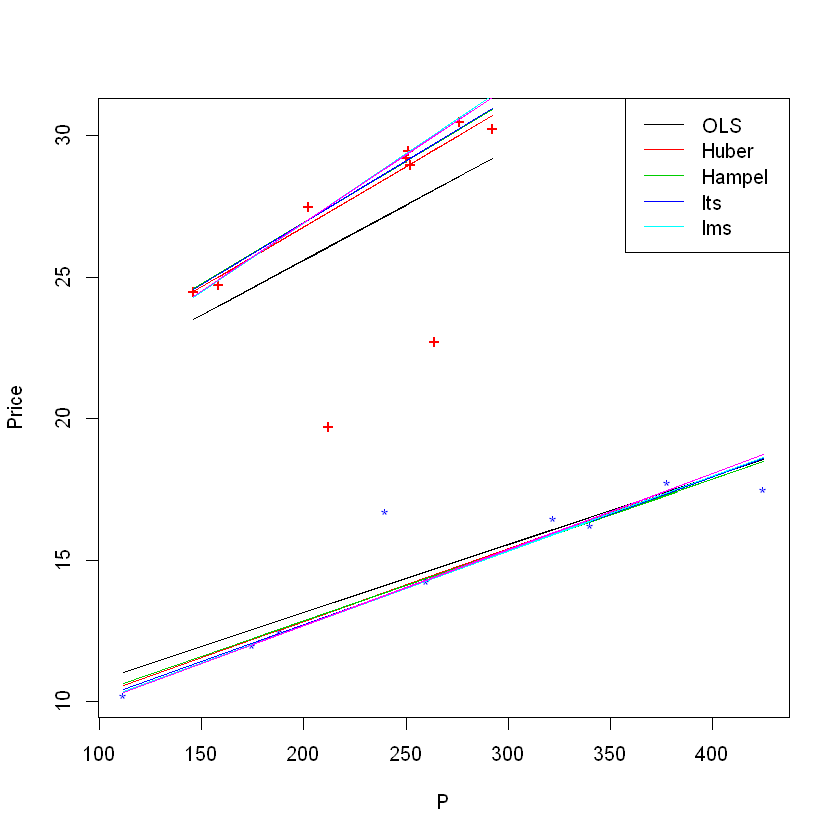

In [38]:
colors <- c("Red", "Blue")
colors <- colors[books$B]
shapes = c('+', '*') 
shapes <- shapes[books$B]
options(repr.plot.width=7, repr.plot.height=7)
par(mfrow = c(1,1))
plot(Price ~ P, data = books, col=colors, pch=shapes)
lines(books[books$B=='p',]$P, predict(lm.fit, books[books$B=='p',]), col=1)
lines(books[books$B=='c',]$P, predict(lm.fit, books[books$B=='c',]), col=1)

lines(books[books$B=='p',]$P, predict(mod.huber, books[books$B=='p',]), col=2)
lines(books[books$B=='c',]$P, predict(mod.huber, books[books$B=='c',]), col=2)

lines(books[books$B=='p',]$P, predict(mod.hampel, books[books$B=='p',]), col=3)
lines(books[books$B=='c',]$P, predict(mod.hampel, books[books$B=='c',]), col=3)

lines(books[books$B=='p',]$P, predict(mod.tukey, books[books$B=='p',]), col=4)
lines(books[books$B=='c',]$P, predict(mod.tukey, books[books$B=='c',]), col=4)

lines(books[books$B=='p',]$P, predict(mod.lms, books[books$B=='p',]), col=5)
lines(books[books$B=='c',]$P, predict(mod.lms, books[books$B=='c',]), col=5)

lines(books[books$B=='p',]$P, predict(mod.lts, books[books$B=='p',]), col=6)
lines(books[books$B=='c',]$P, predict(mod.lts, books[books$B=='c',]), col=6)

legend(x="topright", legend = c("OLS", "Huber", "Hampel", "lts", "lms"), col=1:6, lty=1)

$$
\text{Let's compare the models using k fold with k=1 (leave one out)}
$$

In [39]:
none <- function(x){ return (x)}

kfold <- function(k = 1, un.trans = none, data = books, fit.func, ...){
    n = nrow(data)
    cv = 0
    step = k
    for(i in seq(1,n, by = step)){
        fit <- fit.func(..., data = data[-(i:(i+k-1)), ])
        press <- sum((data[(i:(i+k-1)),1] - un.trans(predict(fit, data[(i:(i+k-1)),-1])))^2)
        cv = cv + press
    }
    cv = cv/n
    
    return(cbind(round(cv, digits = 5)))
}

In [40]:
mod.huber.kfold <- kfold(fit.func = rlm, formula = Price ~ P + B + P * B, psi = psi.huber)
mod.hampel.kfold <- kfold(fit.func = rlm, formula = Price ~ P + B + P * B, psi = psi.hampel)
mod.tukey.kfold <- kfold(fit.func = rlm, formula = Price ~ P + B + P * B, psi = psi.bisquare)
mod.lms.kfold <- kfold(fit.func = lqs, formula = Price ~ P + B + P * B, method = "lms")
mod.lts.kfold <- kfold(fit.func = lqs, formula = Price ~ P + B + P * B, method = "lts")

# Note that I'm using un.trans to go back to the original scale
mod.loglog.kfold <- kfold(un.trans = exp, fit.func = lm, formula = log(Price) ~ log(P) + B + log(P) * B)


models <- c("full log log model", 
            "Huber",
            "Hampel",
            "Tukey",
            "lms",
            "lts"
           )
cv.original.scale <- rbind(mod.loglog.kfold, 
                       mod.huber.kfold,
                       mod.hampel.kfold,
                       mod.tukey.kfold,
                       mod.lms.kfold,
                       mod.lts.kfold
                      )

results <- cbind(models, cv.original.scale)

colnames(results) <- c("Model", "CV on original scale")

results

Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"

Model,CV on original scale
full log log model,6.72315
Huber,6.02833
Hampel,6.09954
Tukey,6.09151
lms,6.34038
lts,6.33307


$$
\text{What about the model without the outliers?}
$$

In [41]:
mod.loglog.screen.kfold <- kfold(data = data_screen, un.trans = exp, fit.func = lm, 
                                 formula = log(Price) ~ log(P) + B + log(P) * B)

cat("cv: ", mod.loglog.screen.kfold)

cv:  0.62185

$$
\text{Looks better than the robust models, but this cross validation didn't included the removed observations!} 
$$
$$
\text{Let's add the mean prediction error to model's cv (for a fair comparision)}
$$

In [42]:
influential.error = round(
    mean((books[influential,1] - exp(predict(lm.loglog.screen.full.fit, books[influential,-1])))^2)
                          , digits = 5)

mod.loglog.screen.kfold = (mod.loglog.screen.kfold + influential.error)/2
cat("cv: ", mod.loglog.screen.kfold)

cv:  27.99055

$$
\text{Now we can see that the model without the outliers has a huge error} 
$$
$$
\text{(compared to the robust regression models) when trying to predict the outliers}
$$

## What model(s) would you introduce to a client? 
    - How would you interpret your results to him/her? (he is a complete "amateur" in statistics)

$$
\text{Ill present the Huber model to the client} 
$$
$$
\text{since it has the best percision and it is robust for observations with big measurment errors} 
$$

$$
\text{Client interpertation:} 
$$
$$
\text{We have a great model for predicting book price given its pages count and binding.} 
$$
$$
\text{The model is very accurate and is not biased by mistakes in the data.}
$$

## Estimate the price of a 200-page book for the two types of binding and give the corresponding 95% prediction intervals.

In [43]:
data <- data.frame(books[1:2,-1])
data$P <- 200
data$B <- c('p', 'c')

prediction.intervals <- predict(mod.huber, data, interval = "prediction")
# prediction.intervals

cat("For paperback bindind, the price estimation is: ", prediction.intervals[1,1], 
    ". CI=(",prediction.intervals[1,2:3],")\n")

cat("For cloth bindind, the price estimation is: ", prediction.intervals[2,1], 
    ". CI=(",prediction.intervals[2,2:3],")\n")

Warning message in predict.lm(mod.huber, data, interval = "prediction", scale = 0.514481283876252):
"Assuming constant prediction variance even though model fit is weighted
"

For paperback bindind, the price estimation is:  12.84051 . CI=( 11.74964 13.93138 )
For cloth bindind, the price estimation is:  26.77525 . CI=( 25.6976 27.8529 )
